# **1**. Import the libraries, load dataset, print shape of data, visualize the images in dataset. 

### Import necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

import tensorflow as tf

from tensorflow.keras import datasets, models, layers, optimizers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, LeakyReLU

from google.colab.patches import cv2_imshow

from keras.utils import np_utils
from keras.utils.np_utils import to_categorical  

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Load dataset

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Image array
imgArr = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')
imgArr

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [5]:
# labels
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')


### View the first and last 5 rows of Labels

In [6]:
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [7]:
df.tail()

,Label
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent
4749,Loose Silky-bent


In [8]:
# Make a copy of Image array and Labels
trainImageset = []
trainLabels = []

trainImageset = imgArr
trainLabels = df

### Understand the shape of the dataset

In [9]:
# Image array shape
print(trainImageset.shape)
# labels shape
print(trainLabels.shape)


(4750, 128, 128, 3)
(4750, 1)


There are 4750 color images of size 128 by 128 

There is 1 column and 4750 observations in the Labels dataset

### Check the number of unique values in Labels

In [10]:
trainLabels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

There are 12 unique labels in the dataset

In [11]:
trainLabels.value_counts().sum()

4750

There are no missing values in the Labels

### visualize images of each type in Labels dataset

Text(0.5, 1.0, 'Loose Silky-bent')

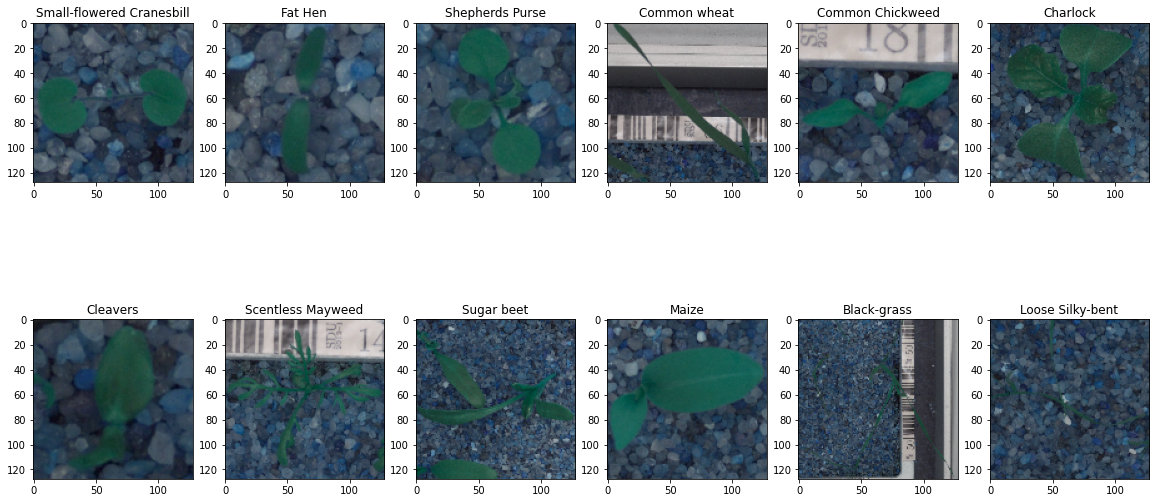

In [12]:
# display images 1 of each type
f = plt.figure(figsize=(20, 20))

f.add_subplot(2, 6, 1)
plt.imshow(trainImageset[0])
plt.title(trainLabels['Label'].iloc[0])

f.add_subplot(2, 6, 2)
plt.imshow(trainImageset[496])
plt.title(trainLabels['Label'].iloc[496])

f.add_subplot(2, 6, 3)
plt.imshow(trainImageset[971])
plt.title(trainLabels['Label'].iloc[971])
 
f.add_subplot(2, 6, 4)
plt.imshow(trainImageset[1202])
plt.title(trainLabels['Label'].iloc[1202])

f.add_subplot(2, 6, 5)
plt.imshow(trainImageset[1423])
plt.title(trainLabels['Label'].iloc[1425])

f.add_subplot(2, 6, 6)
plt.imshow(trainImageset[2034])
plt.title(trainLabels['Label'].iloc[2034])

f.add_subplot(1, 6, 1)
plt.imshow(trainImageset[2424])
plt.title(trainLabels['Label'].iloc[2424])

f.add_subplot(1, 6, 2)
plt.imshow(trainImageset[2711])
plt.title(trainLabels['Label'].iloc[2711])

f.add_subplot(1, 6, 3)
plt.imshow(trainImageset[3227])
plt.title(trainLabels['Label'].iloc[3227])
 
f.add_subplot(1, 6, 4)
plt.imshow(trainImageset[3612])
plt.title(trainLabels['Label'].iloc[3612])

f.add_subplot(1, 6, 5)
plt.imshow(trainImageset[3833])
plt.title(trainLabels['Label'].iloc[3833])

f.add_subplot(1, 6, 6)
plt.imshow(trainImageset[4096])
plt.title(trainLabels['Label'].iloc[4096])

There are 12 different types of plant images

# **2**. Data Pre-processing: 
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.

### Normalization

In [13]:
# Convert value type to floating 32 data type and standardizing training dataset 
trainImageset = trainImageset.astype('float32')
trainImageset = trainImageset / 255.0


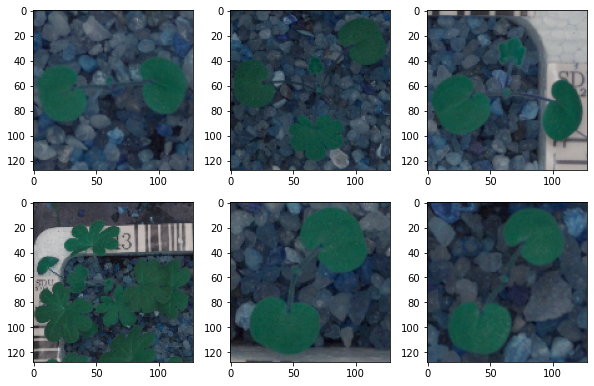

In [14]:
# Visualize first 6 images after applying Normalization  
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainImageset[i], cmap = plt.get_cmap('RdYlGn'))
plt.show()

### Gaussian Blurring

In [15]:
# Applying Gaussian Blurring to reduce noise and details
trainImg_new = []
for i in trainImageset:
    # Blurred image
    blurr = cv2.GaussianBlur(i,(5, 5),0)
    trainImg_new.append(blurr)
trainImg_new = np.asarray(trainImg_new)

In [16]:
# Check shape of training dataset
trainImg_new.shape

(4750, 128, 128, 3)

### Visualize data after pre-processing

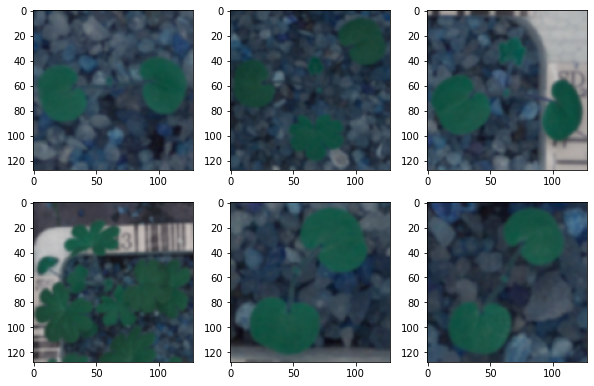

In [17]:
# Visualize first 6 images after applying Gaussian Blurring 
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainImg_new[i], cmap = plt.get_cmap('RdYlGn'))
    
plt.show()

# **3**. Make data compatible:
a. Convert labels to one-hot-vectors.

b. Print the label for y_train[0].

c. Split the dataset into training, testing, and validation set.

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

### Convert labels to one-hot-vectors

In [18]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabels)
print('Classes'+str(labels.classes_))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [19]:
encodedlabel = labels.transform(trainLabels)
convertedlabels = np_utils.to_categorical(encodedlabel)
classes = convertedlabels.shape[1]
# Print number of classes 
print('Number of Classes: ' + str(classes))

Number of Classes: 12


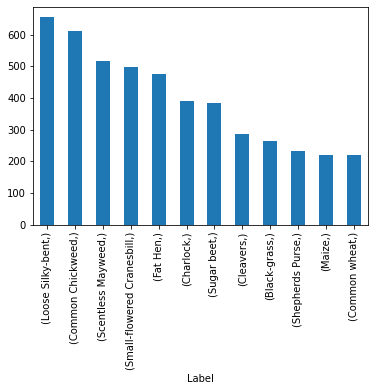

In [20]:
trainLabels.value_counts().plot(kind='bar')

### Split the dataset into training, testing, and validation set

In [21]:
# First split images and labels into training and testing set with test_size = 0.3
X_train,X_test,y_train,y_test = train_test_split(trainImg_new,convertedlabels,test_size=0.3,random_state=42,stratify=convertedlabels)

In [22]:
print("Shape of X_train set : {0}" .format(X_train.shape))
print("Shape of y_train set : {0}" .format(y_train.shape))
print("")
print("Shape of X_test set : {0}" .format(X_test.shape))
print("Shape of y_test set : {0}" .format(y_test.shape))

Shape of X_train set : (3325, 128, 128, 3)
Shape of y_train set : (3325, 12)

Shape of X_test set : (1425, 128, 128, 3)
Shape of y_test set : (1425, 12)


In [23]:
# split test data into test and validation set with test_size = 0.5
X_val,X_test_new,y_val,y_test_new = train_test_split(X_test,y_test,test_size=0.5,random_state=42,stratify=y_test)

In [24]:
# Print shape of training, testing and vaidation independent and dependent dataset
print("Shape of X_train set : {0}" .format(X_train.shape))
print("Shape of y_train set : {0}" .format(y_train.shape))
print("")
print("Shape of X_val set : {0}" .format(X_val.shape))
print("Shape of y_val set : {0}" .format(y_val.shape))
print("")
print("Shape of X_test_new set : {0}" .format(X_test_new.shape))
print("Shape of y_test_new set : {0}" .format(y_test_new.shape))

Shape of X_train set : (3325, 128, 128, 3)
Shape of y_train set : (3325, 12)

Shape of X_val set : (712, 128, 128, 3)
Shape of y_val set : (712, 12)

Shape of X_test_new set : (713, 128, 128, 3)
Shape of y_test_new set : (713, 12)


### Print the label for y_train[0]

In [25]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [26]:
print("Label for y_train[0]: " , labels.classes_[np.where(y_train[0] == 1.0)])

Label for y_train[0]:  ['Loose Silky-bent']


### Compatibility with Keras

In Keras, The input features should be 4-dimensional to build a CNN model.

Here, we have already have 4-dimensional input.

Shape of data, is already in compatible shape with Keras models.

### confusion matrix function

In [27]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    import itertools
    fig = plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [28]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# **4**. Building CNN: 
a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

### CNN Model 1: 

In [29]:
# initialize the model
model1 = Sequential()

# adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension 
model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", input_shape=(128, 128, 3), activation='relu'))

# adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2)))

# adding second conv layer with 128 filters and with kernel size 3x3
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of second conv layer
model1.add(MaxPooling2D((2, 2)))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# adding a fully connected dense layer with 64 neurons  
model1.add(Dense(64, activation='relu'))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(classes, activation='softmax'))

#compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# printing the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7872576   
_________________________________________________________________
dense_1 (Dense)              (None, 12)                7

In [31]:
#Fitting the model
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=20, verbose=2,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/20
52/52 - 4s - loss: 2.4825 - accuracy: 0.1441 - val_loss: 2.3554 - val_accuracy: 0.1840
Epoch 2/20
52/52 - 1s - loss: 2.2438 - accuracy: 0.2409 - val_loss: 2.0592 - val_accuracy: 0.2992
Epoch 3/20
52/52 - 1s - loss: 1.8229 - accuracy: 0.3853 - val_loss: 1.6227 - val_accuracy: 0.4382
Epoch 4/20
52/52 - 1s - loss: 1.4383 - accuracy: 0.4962 - val_loss: 1.3583 - val_accuracy: 0.5449
Epoch 5/20
52/52 - 1s - loss: 1.2228 - accuracy: 0.5741 - val_loss: 1.3039 - val_accuracy: 0.5562
Epoch 6/20
52/52 - 1s - loss: 1.0912 - accuracy: 0.6214 - val_loss: 1.2028 - val_accuracy: 0.6011
Epoch 7/20
52/52 - 2s - loss: 1.0534 - accuracy: 0.6301 - val_loss: 1.1810 - val_accuracy: 0.6166
Epoch 8/20
52/52 - 2s - loss: 0.9491 - accuracy: 0.6752 - val_loss: 1.1501 - val_accuracy: 0.6180
Epoch 9/20
52/52 - 2s - loss: 0.9041 - accuracy: 0.6875 - val_loss: 1.1345 - val_accuracy: 0.6236
Epoch 10/20
52/52 - 1s - loss: 0.8289 - accuracy: 0.7221 - val_loss: 1.1384 - val_accuracy: 0.6306
Epoch 11/20
52/52 -

In [32]:
pd.DataFrame(history1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.482465,0.144060,2.355422,0.183989
1,2.243790,0.240902,2.059203,0.299157
2,1.822930,0.385263,1.622677,0.438202
3,1.438296,0.496241,1.358312,0.544944
4,1.222753,0.574135,1.303915,0.556180
5,1.091183,0.621353,1.202848,0.601124
6,1.053378,0.630075,1.181002,0.616573
7,0.949103,0.675188,1.150136,0.617977
8,0.904059,0.687519,1.134459,0.623595
9,0.828876,0.722105,1.138421,0.630618


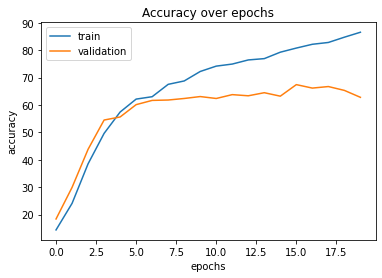

In [33]:
plt.plot(np.array(history1.history['accuracy']) * 100)
plt.plot(np.array(history1.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

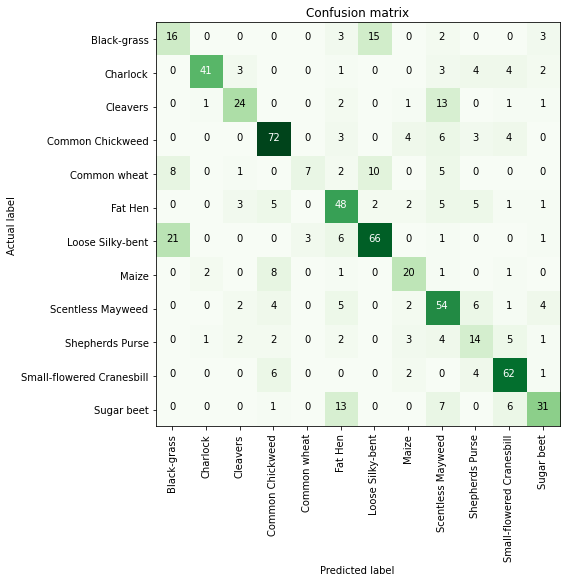

In [34]:
# Predict the values from the test data
y_pred1 = model1.predict(X_test_new)
y_pred1_Classes = np.argmax(y_pred1, axis = 1) 
trueY1 = np.argmax(y_test_new, axis = 1) 

# confusion matrix
cm1 = confusion_matrix(trueY1, y_pred1_Classes) 

# plot the confusion matrix
plot_confusion_matrix(cm1, classes = labels.classes_) 

In [35]:
#Final score and accuracy of the model

ts_score_m1, ts_acc_m1 = model1.evaluate(X_test_new,y_test_new)
tr_score_m1, tr_acc_m1 = model1.evaluate(X_train,y_train)

104/104 [==============================] - 1s 9ms/step - loss: 0.4301 - accuracy: 0.8608


In [36]:
print('Test loss:', ts_score_m1,'         Test accuracy:', ts_acc_m1)
print('Train loss:', tr_score_m1,'      Train accuracy:',tr_acc_m1)

Test loss: 1.2776907682418823          Test accuracy: 0.6381486654281616
Train loss: 0.4301081895828247       Train accuracy: 0.8607518672943115


### Observation:
We can see from the above plot that the model has done poorly on the test data. The model is overfitting.

Let's try adding few dropout layers to the model structure to reduce overfitting and see if this improves the model or not.

In [37]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [38]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### CNN Model 2: 

In [39]:
# initialize the model
model2 = Sequential()

# adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension 

model2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), padding="same", activation='relu'))

# adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 25% neurons to reduce overfitting
model2.add(Dropout(0.25))

# adding second conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension 
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 25% neurons to reduce overfitting
model2.add(Dropout(0.25))

# adding third conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension 
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 25% neurons to reduce overfitting
model2.add(Dropout(0.25))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# adding a fully connected dense layer with 256 neurons  
model2.add(Dense(256, activation='relu'))

# adding dropout to randomly switch off 50% neurons to reduce overfitting
model2.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(classes, activation='softmax'))

#compiling the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# printing the model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 128)       1

In [41]:
#Fitting the model
history2 = model2.fit(X_train,y_train,batch_size=64,epochs=100, verbose=2,shuffle=True,validation_data=(X_val,y_val))


Epoch 1/100
52/52 - 3s - loss: 2.4950 - accuracy: 0.1173 - val_loss: 2.4420 - val_accuracy: 0.1278
Epoch 2/100
52/52 - 2s - loss: 2.4360 - accuracy: 0.1233 - val_loss: 2.4212 - val_accuracy: 0.1573
Epoch 3/100
52/52 - 2s - loss: 2.4200 - accuracy: 0.1344 - val_loss: 2.4235 - val_accuracy: 0.1419
Epoch 4/100
52/52 - 2s - loss: 2.3120 - accuracy: 0.2093 - val_loss: 1.9137 - val_accuracy: 0.3778
Epoch 5/100
52/52 - 2s - loss: 1.7871 - accuracy: 0.3943 - val_loss: 1.4506 - val_accuracy: 0.5295
Epoch 6/100
52/52 - 2s - loss: 1.4350 - accuracy: 0.5038 - val_loss: 1.1924 - val_accuracy: 0.6166
Epoch 7/100
52/52 - 2s - loss: 1.2448 - accuracy: 0.5702 - val_loss: 1.1229 - val_accuracy: 0.6517
Epoch 8/100
52/52 - 2s - loss: 1.1551 - accuracy: 0.5910 - val_loss: 1.0564 - val_accuracy: 0.6601
Epoch 9/100
52/52 - 2s - loss: 1.0733 - accuracy: 0.6322 - val_loss: 0.9890 - val_accuracy: 0.6966
Epoch 10/100
52/52 - 2s - loss: 0.9662 - accuracy: 0.6641 - val_loss: 1.0079 - val_accuracy: 0.6728
Epoch 11/

In [42]:
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,2.495011,0.117293,2.442014,0.127809
1,2.435982,0.123308,2.421185,0.157303
2,2.419969,0.134436,2.423502,0.141854
3,2.311968,0.209323,1.913711,0.377809
4,1.787144,0.394286,1.450556,0.529494
...,...,...,...,...
95,0.115776,0.958196,1.555050,0.764045
96,0.122166,0.954887,1.513064,0.779494
97,0.149888,0.951278,1.445044,0.772472
98,0.164322,0.942256,1.398418,0.772472


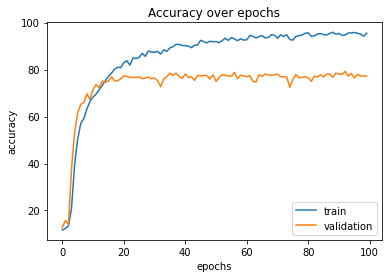

In [43]:
plt.plot(np.array(history2.history['accuracy']) * 100)
plt.plot(np.array(history2.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

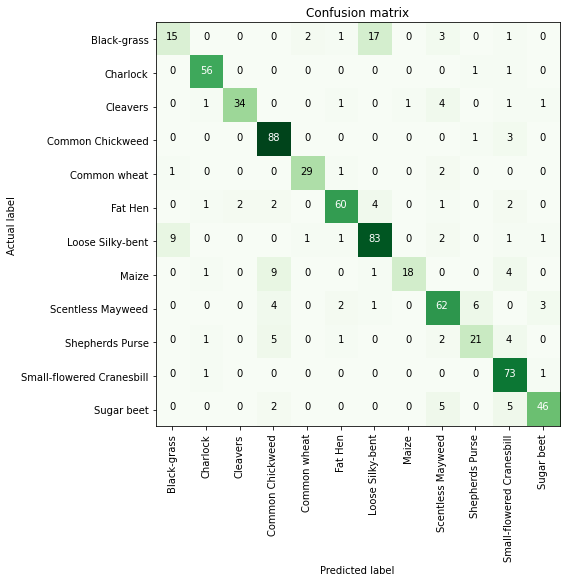

In [44]:
# Predict the values from the test data
y_pred2 = model2.predict(X_test_new)
y_pred2_Classes = np.argmax(y_pred2, axis = 1) 
trueY2 = np.argmax(y_test_new, axis = 1) 

# confusion matrix
cm2 = confusion_matrix(trueY2, y_pred2_Classes) 

# plot the confusion matrix
plot_confusion_matrix(cm2, classes = labels.classes_) 

In [45]:
#Final score and accuracy of the model

ts_score_m2, ts_acc_m2 = model2.evaluate(X_test_new,y_test_new)
tr_score_m2, tr_acc_m2 = model2.evaluate(X_train,y_train)

104/104 [==============================] - 1s 8ms/step - loss: 0.0058 - accuracy: 1.0000


In [46]:
print('Test loss:', ts_score_m2,'         Test accuracy:', ts_acc_m2)
print('Train loss:', tr_score_m2,'      Train accuracy:',tr_acc_m2)

Test loss: 1.2607370615005493          Test accuracy: 0.8204768300056458
Train loss: 0.00584441376850009       Train accuracy: 1.0


### Observations:
We can see from the above plot that the model has done better than Model 1 but performance still needs to improve on test data. The model is still overfitting.

Let's try adding more conv layers, few more dropout layers to the model structure to reduce overfitting and see if this improves the model or not.

In [47]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [48]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### CNN Model 3

In [49]:
# initialized a sequential model
model3 = Sequential()

# adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of CIFAR images
model3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))

# adding max pooling to reduce the size of output of second conv layer
model3.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 10% of the network to reduce overfitting
model3.add(Dropout(0.1))

# adding second conv layer with 128 filters and with kernel size 3x3
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of second conv layer
model3.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 10% of the network to reduce overfitting
model3.add(Dropout(0.1))

# adding third conv layer with 128 filters and with kernel size 3x3
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of second conv layer
model3.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 10% of the network to reduce overfitting
model3.add(Dropout(0.1))

# adding fourth conv layer with 128 filters and with kernel size 3x3
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of second conv layer
model3.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 10% of the network to reduce overfitting
model3.add(Dropout(0.1))

# adding fifth conv layer with 256 filters and with kernel size 3x3
model3.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))

# adding max pooling to reduce the size of output of second conv layer
model3.add(MaxPooling2D((2, 2)))

# adding dropout to randomly switch off 10% of the network to reduce overfitting
model3.add(Dropout(0.1))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# adding a fully connected dense layer with 256 neurons    
model3.add(Dense(256, activation='relu'))

# adding dropout to randomly switch off 20% of the network to reduce overfitting
model3.add(Dropout(0.2))

# adding a fully connected dense layer with 64 neurons    
model3.add(Dense(64, activation='relu'))

# adding dropout to randomly switch off 20% of the network to reduce overfitting
model3.add(Dropout(0.2))

# adding a fully connected dense layer with 64 neurons   
model3.add(Dense(64, activation='relu'))

# adding dropout to randomly switch off 20% of the network to reduce overfitting
model3.add(Dropout(0.2))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model3.add(Dense(12, activation='softmax'))

#compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# printing the model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       1

In [51]:
#Fitting the model
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=200, verbose=2, shuffle=True, validation_data=(X_val,y_val))

Epoch 1/200
52/52 - 4s - loss: 2.4493 - accuracy: 0.1230 - val_loss: 2.4339 - val_accuracy: 0.1376
Epoch 2/200
52/52 - 2s - loss: 2.4315 - accuracy: 0.1329 - val_loss: 2.4217 - val_accuracy: 0.1376
Epoch 3/200
52/52 - 2s - loss: 2.4254 - accuracy: 0.1308 - val_loss: 2.4242 - val_accuracy: 0.1278
Epoch 4/200
52/52 - 2s - loss: 2.3976 - accuracy: 0.1486 - val_loss: 2.3696 - val_accuracy: 0.2402
Epoch 5/200
52/52 - 2s - loss: 2.1309 - accuracy: 0.3008 - val_loss: 1.7877 - val_accuracy: 0.3666
Epoch 6/200
52/52 - 2s - loss: 1.7747 - accuracy: 0.3687 - val_loss: 1.6120 - val_accuracy: 0.4382
Epoch 7/200
52/52 - 2s - loss: 1.6386 - accuracy: 0.4114 - val_loss: 1.5314 - val_accuracy: 0.4649
Epoch 8/200
52/52 - 2s - loss: 1.5429 - accuracy: 0.4526 - val_loss: 1.4541 - val_accuracy: 0.5028
Epoch 9/200
52/52 - 2s - loss: 1.4864 - accuracy: 0.4689 - val_loss: 1.4102 - val_accuracy: 0.5197
Epoch 10/200
52/52 - 2s - loss: 1.4063 - accuracy: 0.5032 - val_loss: 1.4377 - val_accuracy: 0.5000
Epoch 11/

In [52]:
pd.DataFrame(history3.history)

,loss,accuracy,val_loss,val_accuracy
0,2.449269,0.123008,2.433882,0.137640
1,2.431526,0.132932,2.421660,0.137640
2,2.425435,0.130827,2.424227,0.127809
3,2.397585,0.148571,2.369554,0.240169
4,2.130916,0.300752,1.787667,0.366573
...,...,...,...,...
195,0.026053,0.993684,1.294234,0.828652
196,0.021920,0.993684,1.090095,0.834270
197,0.012031,0.996992,1.153220,0.842697
198,0.016615,0.994586,1.448052,0.834270


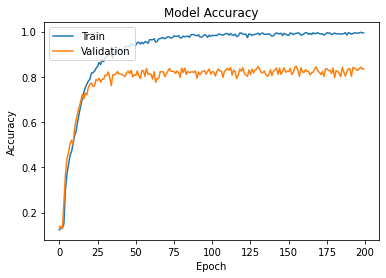

In [53]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

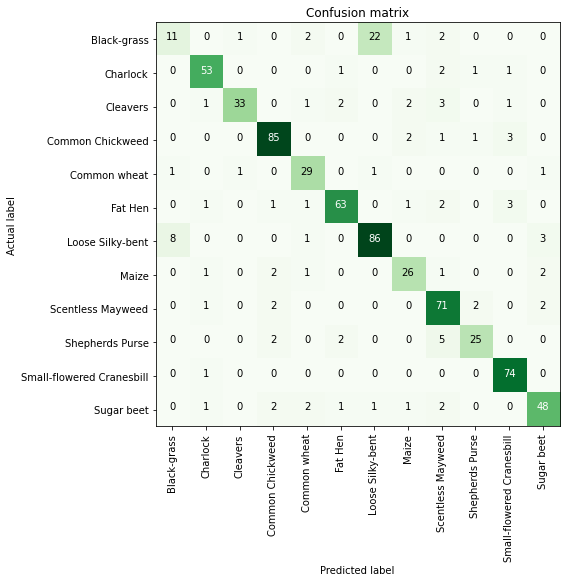

In [54]:
# Predict the values from the test data
y_pred3 = model3.predict(X_test_new)
y_pred3_Classes = np.argmax(y_pred3, axis = 1) 
trueY3 = np.argmax(y_test_new, axis = 1) 

# confusion matrix
cm3 = confusion_matrix(trueY3, y_pred3_Classes) 

# plot the confusion matrix
plot_confusion_matrix(cm3, classes = labels.classes_) 

In [55]:
#Final score and accuracy of the model

ts_score3, ts_acc3 = model3.evaluate(X_test_new,y_test_new)
tr_score3, tr_acc3 = model3.evaluate(X_train,y_train)

104/104 [==============================] - 1s 9ms/step - loss: 1.5020e-04 - accuracy: 1.0000


In [56]:
print('Test loss:', ts_score3,'     Test accuracy:', ts_acc3)
print('Train loss:', tr_score3,'   Train accuracy:',tr_acc3)

Test loss: 1.1114293336868286      Test accuracy: 0.8471248149871826
Train loss: 0.00015019949933048338    Train accuracy: 1.0


### Observations:
The third model seems promising now.

The validation accuracy has improved substantially and the problem of overfitting has been reduced. We can say that the model is giving a generalized performance.

# **6**. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [57]:
# preparing test data for prediction
X_data = []
X_data.append(X_test[2])
X_data.append(X_test[3])
X_data.append(X_test[33])
X_data.append(X_test[36])
X_data.append(X_test[59])

X_data = np.asarray(X_data)

Text(0.5, 1.0, "['Charlock']")

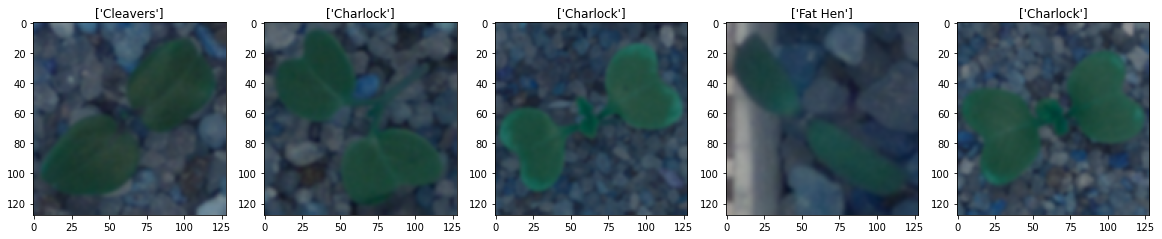

In [58]:
# visualising images to be predicted
label_arr = []
f1 = plt.figure(figsize=(20, 20))

f1.add_subplot(1, 5, 1)
plt.imshow(X_data[0])
label = labels.classes_[np.where(y_test[2] == 1.0)]
label_arr.append(label)
plt.title(label)

f1.add_subplot(1, 5, 2)
plt.imshow(X_data[1])
label = labels.classes_[np.where(y_test[3] == 1.0)]
label_arr.append(label)
plt.title(label)

f1.add_subplot(1, 5, 3)
plt.imshow(X_data[2])
label = labels.classes_[np.where(y_test[33] == 1.0)]
label_arr.append(label)
plt.title(label)

f1.add_subplot(1, 5, 4)
plt.imshow(X_data[3])
label = labels.classes_[np.where(y_test[36] == 1.0)]
label_arr.append(label)
plt.title(label)

f1.add_subplot(1, 5, 5)
plt.imshow(X_data[4])
label = labels.classes_[np.where(y_test[59] == 1.0)]
label_arr.append(label)
plt.title(label)


In [59]:
#Making predictions on the test data
prediction3 = model3.predict(X_data)

#Converting probabilities to class labels
pred3 = np.argmax(prediction3,axis=1)

#prediction
predStr3 = labels.classes_[pred3]

trueYpred3 = np.argmax(X_data, axis = 1) 

#Calculating the probability of the predicted class
pred_max_probas = np.max(prediction3, axis = 1)

print(pred3)
print("Predicted Labels: " ,predStr3)
print("Prediction Probabilities: ", pred_max_probas)


[2 1 1 5 1]
Predicted Labels:  ['Cleavers' 'Charlock' 'Charlock' 'Fat Hen' 'Charlock']
Prediction Probabilities:  [0.9999999  0.99985814 1.         1.         1.        ]


### Visualizing predicted images

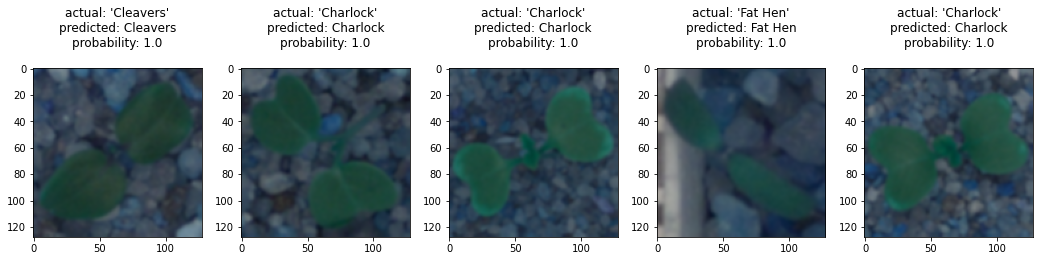

In [60]:
plt.figure(figsize=(18, 18))
for i in range(len(X_data)):
    plt.subplot(550 + 1 + i)
    plt.imshow(X_data[i], cmap = plt.get_cmap('RdYlGn'))
    plt.title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(str(label_arr[i])[1:-1], predStr3[i], pred_max_probas[i]))
plt.show()

### Observation: 
We can see the model predicted all the images correctly.

